In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# 1. Load the dataset
# The dataset is loaded from a CSV file and column names are assigned.
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"  # Specify your dataset path here

col_names = ['Class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
             'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
             'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315_of_diluted_wines', 'Proline']

df = pd.read_csv(data, header=None)
df.columns = col_names

# Display the first few rows of the dataset
df.head()

,Class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


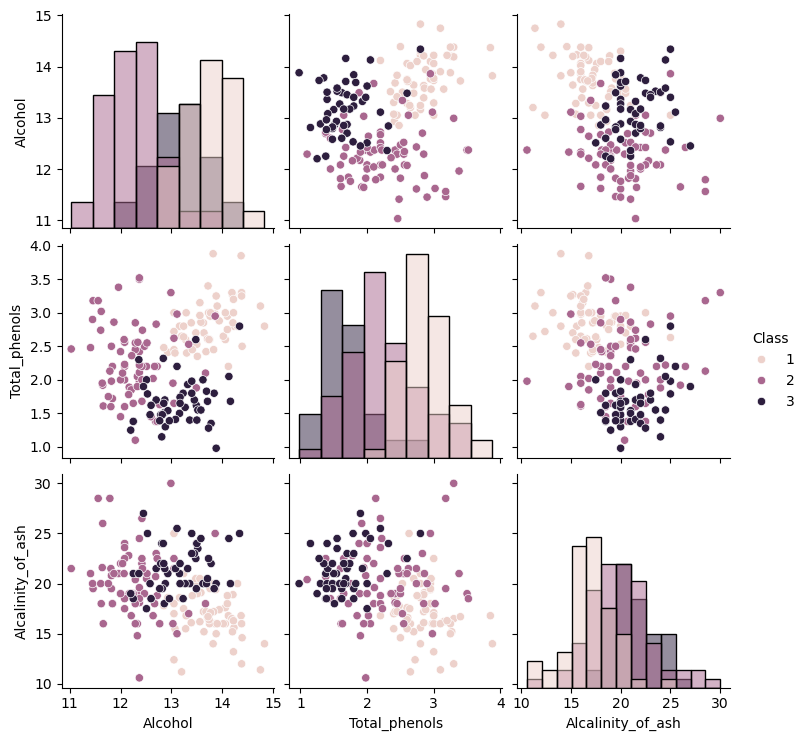

In [7]:

# 2. Visualizing selected features
# A pairplot is created for selected features to observe class separability.
selected_features = ['Alcohol', 'Total_phenols', 'Alcalinity_of_ash']
sns.pairplot(df, vars=selected_features, hue='Class', diag_kind='hist')
plt.show()

In [8]:

# 3. Split features and labels
# Separating independent variables (X) and dependent variable (y).
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

In [9]:
# 4. Split into training and testing sets
# The dataset is divided into 80% training and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# 5. Standardize the data
# StandardScaler is used to normalize the feature values.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# 6. Implementing the k-NN Algorithm
# A custom k-NN classifier is implemented from scratch.
class KNN:
    def __init__(self, k=3, metric='euclidean'):
        """Initialize k-NN classifier with given k and distance metric."""
        self.k = k
        self.metric = metric
    
    def fit(self, X_train, y_train):
        """Store the training data."""
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        """Predict class labels for test data."""
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        """Compute distances and return the most common class label among k nearest neighbors."""
        if self.metric == 'euclidean':
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        elif self.metric == 'manhattan':
            distances = [np.sum(np.abs(x - x_train)) for x_train in self.X_train]
        else:
            raise ValueError("Unsupported distance metric")
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [12]:
# 7. Evaluate Accuracy vs K for both Euclidean and Manhattan metrics
# List of k values to test
k_values = [1, 3, 5, 7, 9]

# Lists to store accuracy values for both metrics
accuracy_euclidean = []
accuracy_manhattan = []

# Evaluate k-NN for each k and both metrics
for k in k_values:
    # Euclidean metric
    knn_euclidean = KNN(k=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    accuracy_euclidean.append(accuracy_score(y_test, y_pred_euclidean))
    
    # Manhattan metric
    knn_manhattan = KNN(k=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracy_manhattan.append(accuracy_score(y_test, y_pred_manhattan))

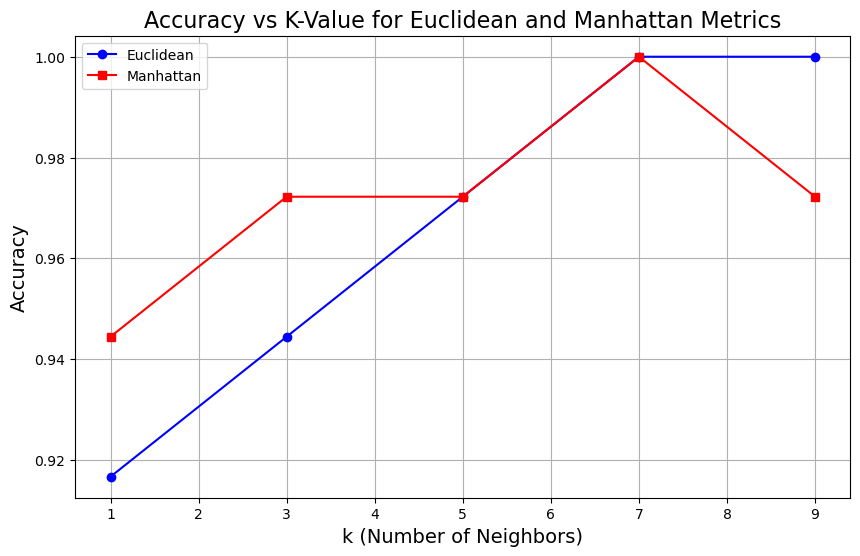

In [13]:
# 8. Plot Accuracy vs K for both metrics
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_euclidean, label='Euclidean', marker='o', color='b')
plt.plot(k_values, accuracy_manhattan, label='Manhattan', marker='s', color='r')
plt.xlabel('k (Number of Neighbors)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs K-Value for Euclidean and Manhattan Metrics', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# 9. Select the best performing model (for example, k=7 and Euclidean)
best_knn = KNN(k=7, metric='euclidean')
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

In [15]:
# 10. Evaluation
# The model's performance is analyzed using a confusion matrix and classification report.
print(f'Best Model - k = 7, Metric = Euclidean')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))
print('Classification Report:\n', classification_report(y_test, y_pred_best))

Best Model - k = 7, Metric = Euclidean
Confusion Matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

